In [12]:
cov_iris<-cov(iris[,1:4])

In [13]:
# sumatoria de la diagonal principal de cov
s2 <- sum(diag(cov_iris))

# sumatoria del triangulo inferior o superior de cov
c2 <- sum(cov_iris[lower.tri(cov_iris)])

In [14]:
s2/(s2+c2)

[1] 0.6381978

In [1]:
iris1<-iris[1:50,3:4]
rc <- cor(iris1[,1], iris1[,2])
ri <- 1:10000

In [2]:
for (i in 1:10000) {
    ri[i]<-cor(iris1[,1], iris1[sample(1:50,50),2])
}

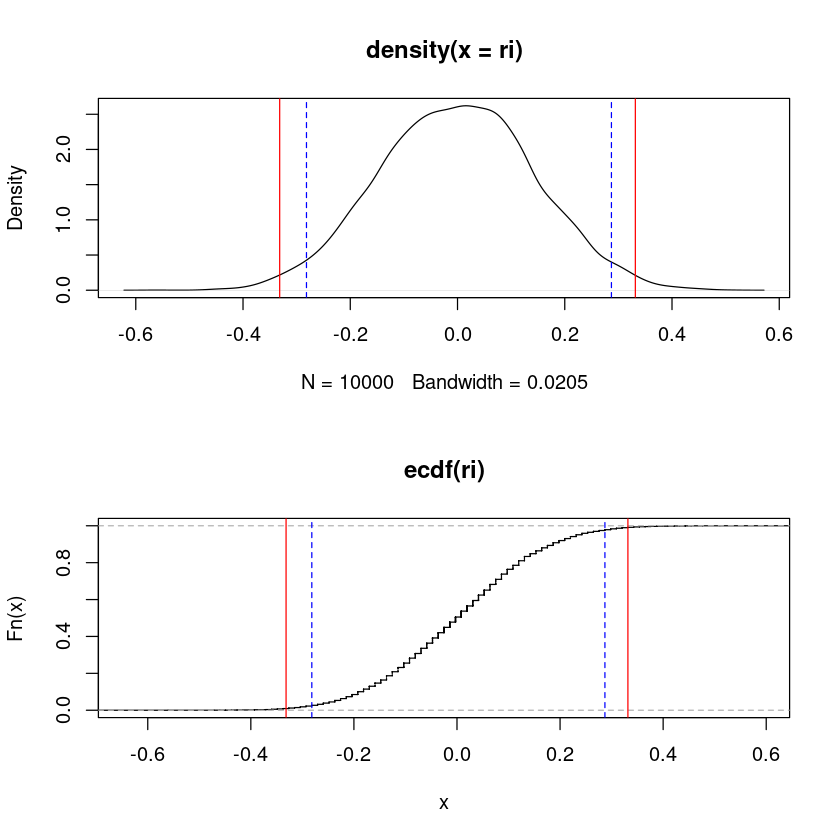

In [3]:
densidad<-density(ri)
par(mfrow = c(2,1))
plot(density(ri))
abline(v=c(rc,-rc), col="red")
abline(v=quantile(ri, c(0.025,0.975)), lty=2, col="blue")

plot(ecdf(ri))
abline(v=c(rc,-rc), col="red")
abline(v=quantile(ri, c(0.025,0.975)), lty=2, col="blue")

In [4]:
# Integrando la funcion aproxima de la densidad de probabilidad
f_densidad <- approxfun(densidad$x, densidad$y)
pvalr<-round(integrate(f_densidad, lower = rc, upper = max(ri))$value,4)
pvall<-round(integrate(f_densidad, lower = min(ri), upper = -rc)$value,4)

pvalue <- pvall + pvalr
pvalue

[1] 0.0199

In [5]:
# Sumando los valores de la función de distribución acumulativa empírica
f_ecdf <- ecdf(ri)
pvalr <- (1 - f_ecdf(rc))
pvall <- f_ecdf(-rc)

pvalue <- pvall + pvalr
pvalue

[1] 0.0175

In [6]:
# Por acumulacion de valores menores o mayores o igual al r critico
pvalr <- mean(ri >= rc)
pvall <- mean(ri <= -rc)

pvalue <- pvalr + pvall
pvalue

[1] 0.018

In [7]:
# # Sombrear el área desde el mínimo al cuantil 0.025
# polygon(c(densidad$x[densidad$x <= quantile(ri, 0.025)], 
#           rev(densidad$x[densidad$x <= quantile(ri, 0.025)])), 
#         c(densidad$y[densidad$x <= quantile(ri, 0.025)], 
#           rep(0, sum(densidad$x <= quantile(ri, 0.025)))), 
#         col="lightblue", border=NA)

# # Sombrear el área desde el cuantil 0.975 hasta el máximo
# polygon(c(densidad$x[densidad$x >= quantile(ri, 0.975)], 
#           rev(densidad$x[densidad$x >= quantile(ri, 0.975)])), 
#         c(densidad$y[densidad$x >= quantile(ri, 0.975)], 
#           rep(0, sum(densidad$x >= quantile(ri, 0.975)))), 
#         col="lightblue", border=NA)